# <font color="darkblue"> Prática 03: Minimal Cost-Complexity Prunning </font>

**Objetivos:**


*   Compreender o funcionamento do algoritmo Minimal cost-Complexity Prunning para a realização de podas em uma árvore de decisão;

*   Regularizar o parâmetro de complexidade $\alpha$ através de validação.  

**Atividade 1:**

 

1.   Carregue a base de dados Wisconsin sobre classificação de câncer de mama. Esta base está disponível no pacote sklearn.datasets;
2.   Divide a instância em treino (80%) e teste(20%).

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("N: " + str(len(X)))
print("d: " + str(len(X[0])))

N: 569
d: 30


**Atividade 2:**

1. Utilize a classe *DecisionTreeClassifier*, importada do pacote *sklearn.tree*, para inferir aprendizado dos dados de treinamento;
2. Compute as métricas de aprendizado sobre os dados de teste usando as funções *classification_report*, *accuracy_score* do pacote *sklearn.metrics*.

Ein: 0.0000
Eout: 0.0877
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



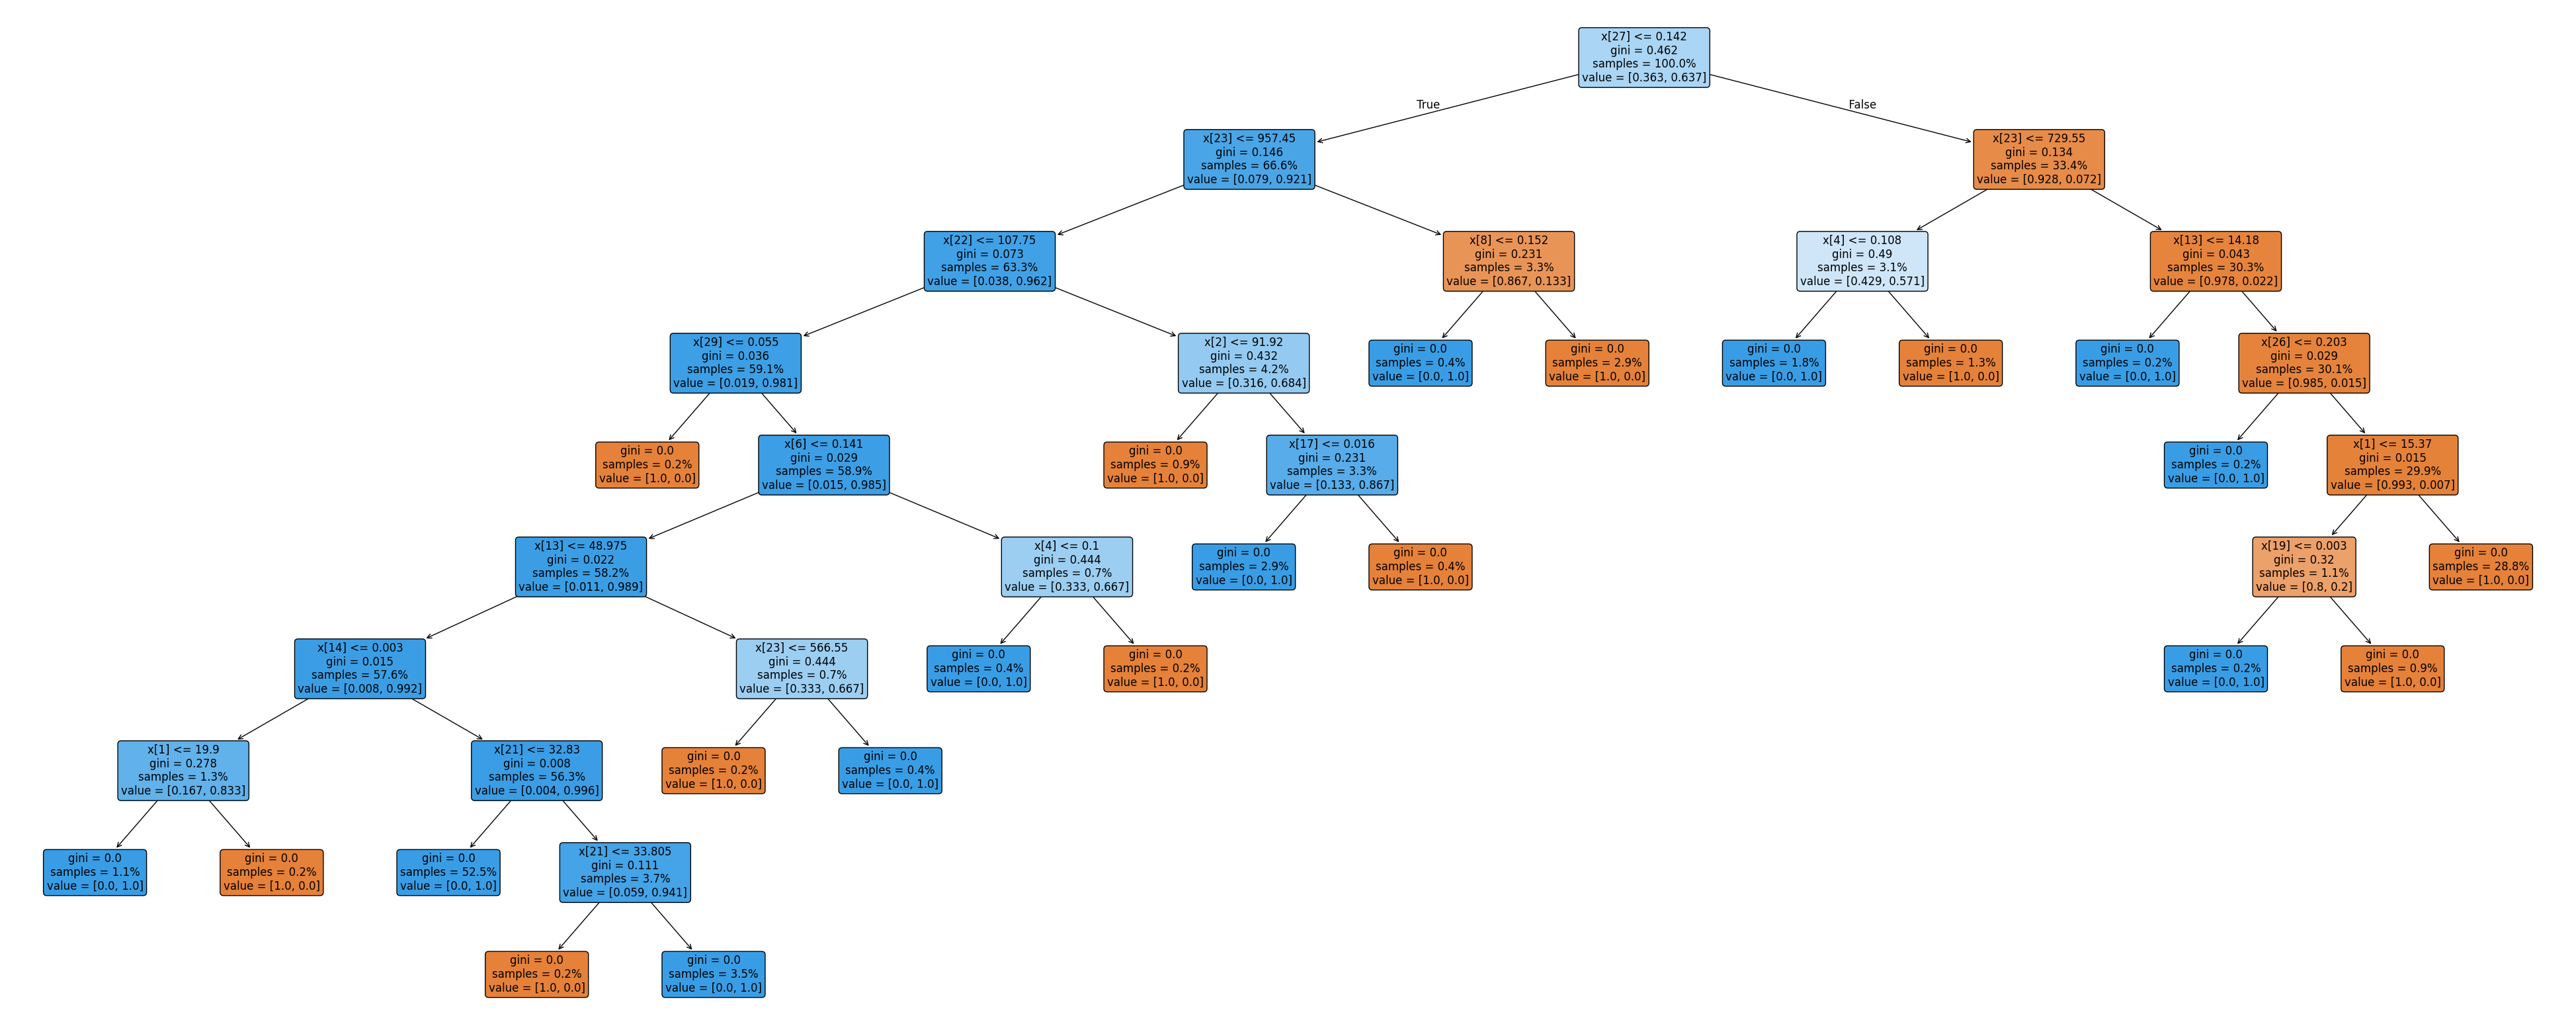

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt


clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True, 
    proportion = True,
    fontsize=12, 
    rounded = True)
plt.show()

**Minimal Cost-Complexity Pruning**

É um algoritmo usado para podar nós da árvore evitando o surgimento de *overfitting*. Este algoritmo é parametrizado por $\alpha\geq0$ conhecido como parâmetro de complexidade da árvore. Este parâmetro é usado para definir o *cost-complexity* $R_{\alpha}(T)$ de uma dada árvore $T$, sendo a fórmula: 

> $R_{\alpha}(T)=R(T) + \alpha\cdot| leafes(T) |,$

onde:

*   $R(T) : $ são erros de classificação da árvore $T$ nos dados de treino;
*   $| leafes(T) | : $ número de folhas de decisão da árvore $T$.

O algoritmo *Minimal Cost-Complexity Pruning* procura a sub árvore que minimiza o $R_{\alpha}(T)$.

Alternativamente, o *sciki-learn* utiliza a impureza dos nós folhas, dados mal classificados que caíram naquele nó, para medir o $R(T)$. A medida *cost-complexity* de um único nó é $R_{\alpha}(t) = R(t) + \alpha$. A ramificação $T_t$ é definida para ser uma árvore onde o nó $t$ é raiz. Em geral a impureza de um nó é maior do que a soma das impurezas de seus nós terminais, $R(T_t) < R(t)$. Entretanto, as medidas de *cost-complexity* de um nó $t$ e sua ramificação podem ser iguais dependendo do valor de $\alpha$. Define-se o $\alpha$ efetivo de um nó $t$ o valor obtido quando $R_{\alpha}(T_t) = R_{\alpha}(t)$, sendo sua fórmula $\alpha_{eff}(t) = \frac{R(t)-R(T_t)}{|T|-1} $. Um nó não terminal com o menor valor de $\alpha_{eff}$ é um elo mais fraco e deve ser podado. Este processo acaba quando o menor valor de $\alpha_{eff}$ é maior que o valor do parâmetro *ccp_alpha*.  


---


**Atividade 3:**

1. Quebrar os dados de treino em : dados de treino (80%), dados de validação (20%);
2. Computar o Cost-Complexity Pruning da instância de treino através da função *cost_complexity_pruning_path* do objeto *DecisionTreeClassifier*;
3. Plotar um gráfico com a relação entre o valor de impureza dos nós folha e o valor efetivo de alpha para a realização do prunning.

[0.         0.00270996 0.00412088 0.00529827 0.00544363 0.00792363
 0.00929839 0.01033329 0.01141529 0.01943252 0.04456091 0.31558851]
[0.         0.01625976 0.02038064 0.02567891 0.03112254 0.04696981
 0.0562682  0.06660149 0.07801678 0.0974493  0.14201021 0.45759872]


C:\Users\kamil\AppData\Local\Temp\ipykernel_11656\415796490.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


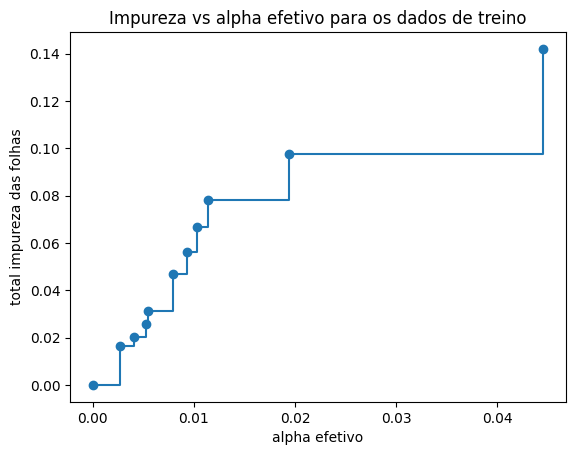

In [3]:
#Divide os dados em treino e validação 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(ccp_alphas)
print(impurities)

**Atividade 4:**

1. Construir uma lista de DecisionTreeClassifier com os valores efetivos de $\alpha$ configurados para a realização do processo de validação do parâmetro *ccp_alpha* utilizando os dados de treinamento;
2. Plotar gráficos com as relações entre o valor do $\alpha$ e o número de nós e o valor de $\alpha$ e a profundidade das árvores.



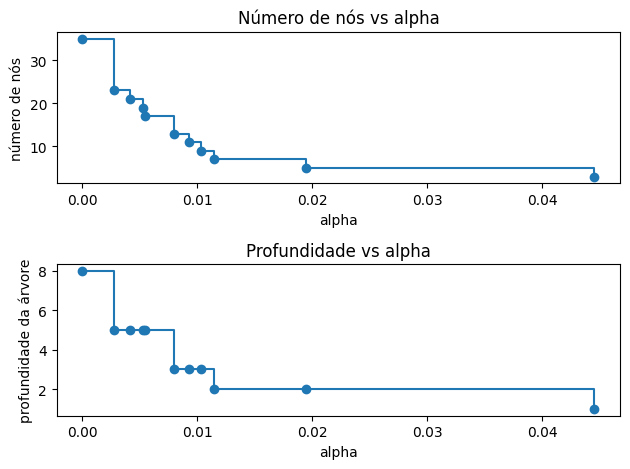

In [4]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

**Atividade 5:**

1. Utilizar a instância de treinamento e validação para computar as acurácias de de cada conjunto de dados
2. Plotar a relação entre os valores de acurária e os valores de $\alpha$ validados.



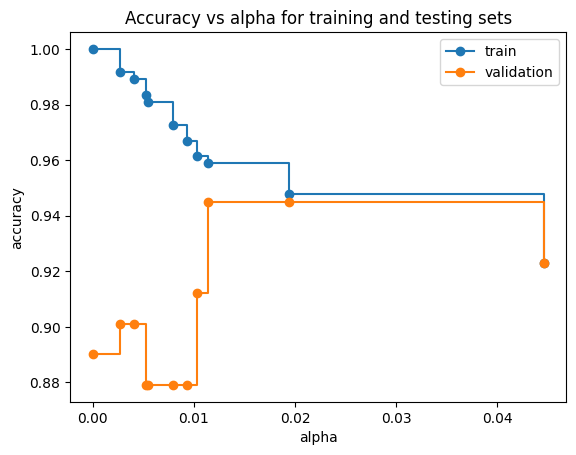

In [5]:
import matplotlib.pyplot as plt

train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

**Atividade 6:**

1. Construir o classificador *DecisionTreeClassifier* com o valor do parâmetro $ccp\_alpha$ que obteve o melhor resultado de acurácia na instância de validação; 
2. Computar o valor de acurácia dos dados de teste e comparar com o classificador da Atividade 2.

Ein: 0.0412
Eout: 0.0351
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



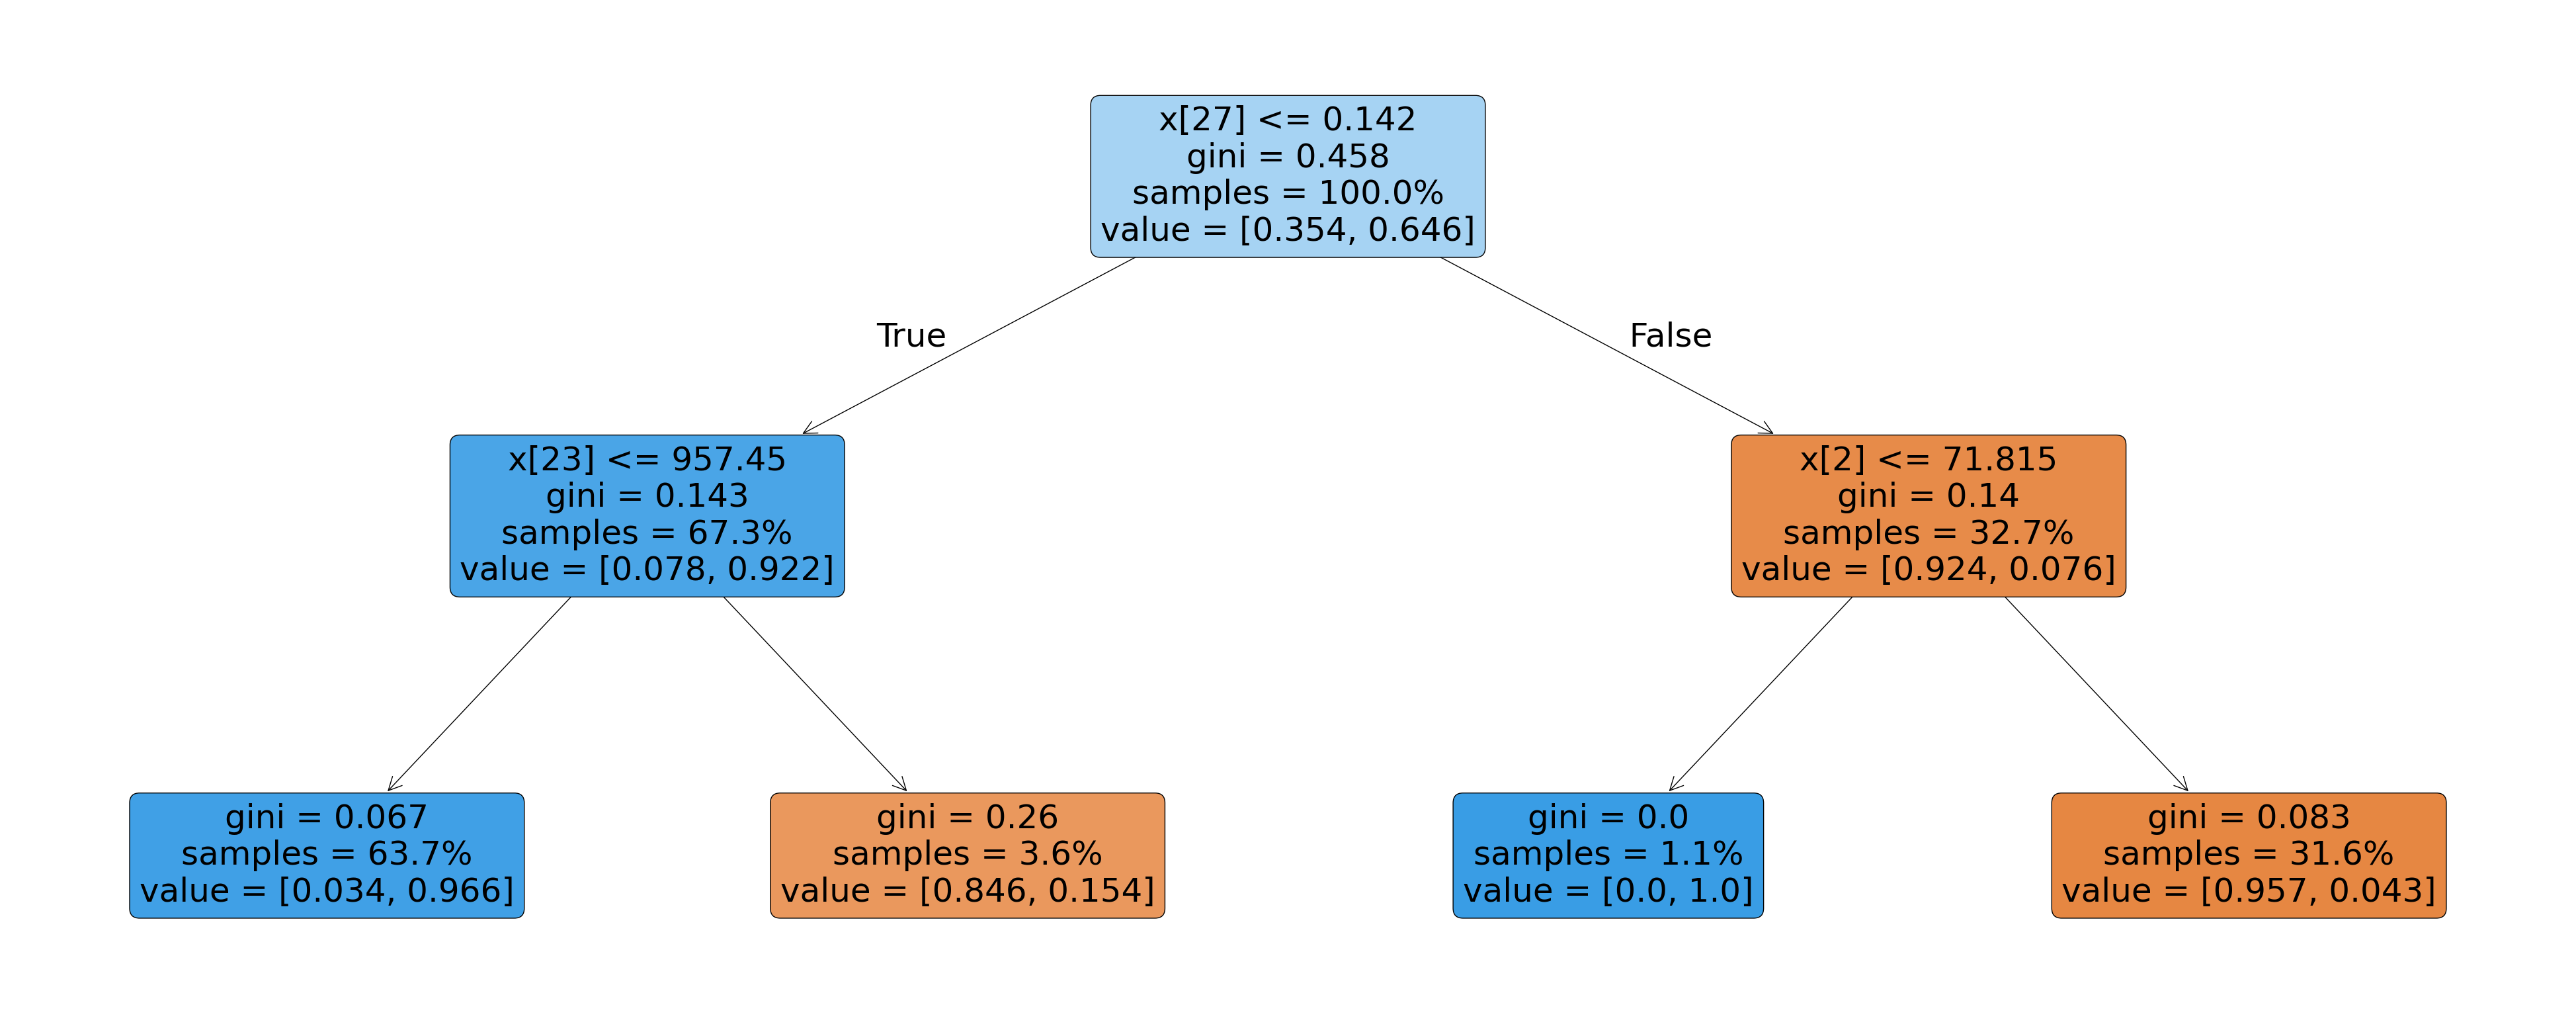

In [6]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01943252)
clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True, 
    proportion = True,
    fontsize=36, 
    rounded = True)
plt.show()

**Atividade 7:**

1. Repetir o processo de validação do parâmetro *ccp_alpha* usando a classe *GridSearchCV* do pacote sklearn.model_selection; 
2. Computar o valor de acurácia dos dados de teste e comparar com o classificador das Atividades 2 e 6.

Parâmetros:


*   *estimator* : instância do classificador cujos hiperparâmetros serão analisados;
*   *cv* : número de divisões do conjunto de treinamento para ser usado na técnica de validação cruzada (10 é um bom valor observado na prática);
*   *param_grid* : conjunto de parâmetros a serem combinados durante a fase de validação.

In [7]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)

param_grid = {'ccp_alpha': path.ccp_alphas}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 7, verbose=2, n_jobs=-1)
CV_clf.fit(X_train, y_train)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_clf.predict(X_test))))
print(classification_report(y_test, CV_clf.predict(X_test)))

Fitting 7 folds for each of 12 candidates, totalling 84 fits
Ein: 0.0264
Eout: 0.0351
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

